# Task 46: Capstone Project VI
Using the data provided in the MNIST database, train a random forest model that can correctly classify the hand written numbers (displayed in a 28 by 28 pixel image).
## Initial set-up
Before the model can be instantiated, the correct modules need to be imported and the dataset loaded.
### Importing the necessary modules:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### Load the dataset
Import the MNIST dataset as a pandas dataframe and assign to the variable <code>train_data</code>. The training data contains 60000 hand written numerals.

In [2]:
train_data = pd.read_csv('mnist_train.csv')
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset is divided into labels (denoting the number) and values for the amount of grey in each pixel in a 28 by 28 grid. The labels will be assigned to a variable y (the dependent variable) and the vectorised image as X (the independent variables).

In [3]:
X = train_data.drop('label', axis=1).values
y = train_data[['label']].values

### Examine the dataset
To get a better idea of the data in question, I arbitrarily selected a few records from the dataset, first reshape the X data into the original 60000 by 28 by 28:

In [57]:
X.shape

(60000, 784)

In [58]:
X = X.reshape(60000, 28, 28)

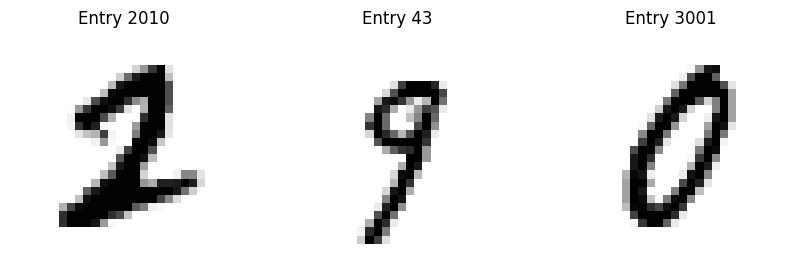

In [59]:
selection_list = [2010, 43, 3001]
plt.figure(figsize=(10, 10))
for count, value in enumerate(selection_list):
    plt.subplot(1, 3, count + 1)
    plt.imshow(X[value, :,:], cmap='gray_r')
    plt.title(f'Entry {value}')
    plt.axis('off')

From above, the numbers in the dataset are grey-scale images of numbers displayed in a 28 by 28 pixel image. Next, look at the labels for each of the entries:

In [60]:
for value in selection_list:
    print(f'Entry {value}: {y[value]}')

Entry 2010: [2]
Entry 43: [9]
Entry 3001: [0]


From above, the labels are correct for each entry. For the random forest algorithm, the data must be 1 dimension so the independent variables need to be revectorised (or in this case, taken from the original DF):

In [4]:
X = train_data.drop('label', axis=1).values

Convert y from a column vector to a 1D array:

In [22]:
y = y.ravel()

## Model Set-up
### Motivation for training, development and test sets
The data is first divided into a training set and a test set. The training set can be further divided into a training set and a development set (also known as a validation set). 
#### Training
The model is initially trained using the training set. This is the process where the model has access to the labels and images, and attempts to establish connections between the values of the independent varaibles and the label. A successful model should be able to generalise the patterns learnt in this stage to previously unseen data. 
#### Development
After an initial model has been trained, the development set is used to measure how well it performs. Here, the model sees the images, but not the labels and must use it's training to classify each number. At this point, the model's hyperparameters can be tweaked to get better performance. 
#### Test
Finally, once the model is finished, the unseen test data is used in the same way as the development set to measure the model's overall accuracy. However, during this stage, the model can no longer be altered. The test set is used to determine the model's ultimate accuracy.

### Train-(development)-test split
Divide the data into training data and test data (here <i>test</i> data refers to the development set. A separate file containing the test data will be used as the test set):

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Check that the distribution of labels is equal between the train set and the test set:

In [24]:
pd.DataFrame(y_train).value_counts(normalize=True)

1    0.112375
7    0.104417
3    0.102188
2    0.099292
9    0.099146
0    0.098708
6    0.098625
8    0.097521
4    0.097375
5    0.090354
dtype: float64

In [25]:
pd.DataFrame(y_test).value_counts(normalize=True)

1    0.112333
7    0.104417
3    0.102167
2    0.099333
9    0.099167
0    0.098750
6    0.098667
8    0.097500
4    0.097333
5    0.090333
dtype: float64

In [82]:
len(y_test)

12000

Both sets have a relatively equal distribution. As a whole, the dataset appears to contain more 1 and 7s and few 5s. This is probably intentional from the authors because 1 and 7 can often be confused (would required more data to make a clear distinction) while 5 is usually easily identified.
### Random Forest model
Now the data is divided, the Random Forest model can be instantiated. Intially set the number of trees in the forest to ten. This allows us to see a rough estimate of the model's accuracy quickly without using too much processing power.

In [89]:
rf_basic = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

Fit the model to the training data:

In [90]:
rf_basic.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

Use the model to predict labels for the test set (development set):

In [91]:
y_pred_basic = rf_basic.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred_basic)

0.9459166666666666

An inital accuracy of 94.6% shows that the model is suitable and fits the data well. However the accuracy can be improved by tuning the hyperparameters.
#### Hyperparameters
Retrieve the parameters from the model:

In [93]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

The maximum number of features (independent variables) for each tree is the square root of the total number of features. In this case, there are 784 features, so each tree has a maximum of 28 features. The minimum number of trees necessary to use all the features would be 28 (higher than 10). In theory, there should be no penalty to using more trees (other than processing time). Try n_estimator = 140 (28 times 5; ensures all features have a good chance of being selected). 

In [94]:
rf = RandomForestClassifier(n_estimators=140, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=140, n_jobs=-1, random_state=1)

In [95]:
y_pred = rf.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.9689166666666666

With 140 trees, the new accuracy is 96.9% (2.3% improvement). With 12000 labels in the test set, this corresponds to correctly predicting 276 more samples. Can the accuracy be further improved with 280 trees (10 multiplied by 28):

In [98]:
rf_max = RandomForestClassifier(n_estimators=280, random_state=1, n_jobs=-1)
rf_max.fit(X_train, y_train)

RandomForestClassifier(n_estimators=280, n_jobs=-1, random_state=1)

In [99]:
y_pred_max = rf_max.predict(X_test)

In [100]:
accuracy_score(y_test, y_pred_max)

0.9691666666666666

With 280 trees, the new accuracy is 96.9%. This roughly the same as with 140 (less than 0.1% better). Therefore, I don't think the increase in accuracy is worth the processing time. The number of estimators in the final model will be set to 140.
### Final predictions
Next, import the test data and measure the final accuracy of the model:

In [101]:
final_test_data = pd.read_csv('mnist_test.csv')
final_test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separate into labels and features:

In [103]:
X_final = final_test_data.drop('label', axis=1).values
y_final = final_test_data[['label']].values

Convert y from a column vector to a 1D array:

In [104]:
y_final = y_final.ravel()

Use the model <code>rf</code> to predict the values of <code>y_final</code> from <code>X_final</code> 

In [105]:
y_pred_final = rf.predict(X_final)

In [106]:
accuracy_score(y_final, y_pred_final)

0.9693

The final accuracy on the test set is similar to that for the development set (96.9%)
### Final model summary
The model performed well on the test set. Examine the confusion matrix to see which classes were easy and which classes were less successful. Columns show the predicts, rows are the actual labels.

In [107]:
c_matrix = confusion_matrix(y_final, y_pred_final)
c_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
pd.DataFrame(c_matrix, columns=c_columns, index=c_columns)

,0,1,2,3,4,5,6,7,8,9
0,970,1,0,0,0,2,3,1,2,1
1,0,1123,2,3,0,1,3,0,2,1
2,6,0,1000,3,3,0,4,8,8,0
3,0,0,13,968,0,10,0,9,8,2
4,1,0,2,0,954,0,4,0,3,18
5,2,1,1,9,4,860,6,1,5,3
6,6,3,2,0,3,3,936,0,5,0
7,1,4,22,1,1,0,0,986,1,12
8,3,0,4,8,6,5,4,4,932,8
9,4,4,2,10,10,4,1,4,6,964


The number of images for each label:

In [108]:
pd.DataFrame(y_final).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

Based on the above information, the model is very successful at predicting 0, 1 and 6. Very few of those images were incorrectly classifed. The model incorrectly predicted a 7 as a 2 on 22 occasions, and a 4 as a 9 on 18 occassions. However, these incorrect predictions are vastly outnumbered by correct predictions.

#### Classification report

In [109]:
print(classification_report(y_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



The classification report supports the confusion matrix. 0, 1 and 6 have a high f1-score and the lowest f1-scores are for 3, 8 and 9.
#### Improved efficiency
It may be possible to improve the model more. In the dataframe there are a lot of columns that contain all 0. This implies that all images contain white space in that particular pixel. By dropping these columns, we can reduce the number of features, and require fewer trees to reach the same accuracy. This may also increase the accuracy of the predictions. We are  interested in what features distinguish numbers, so features common to all the numbers in the dataset are unnecessary and may reduce accuracy.